<a href="https://colab.research.google.com/github/adhi0706/Heart-disease-classification/blob/main/Heartresearchpaperwithoutlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
#Sampling - Read the data
file_path = "/content/heart1.csv"
df = pd.read_csv(file_path)

Exploratory data Analysis

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.sample(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
130,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
78,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
327,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
880,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1
499,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
709,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
272,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


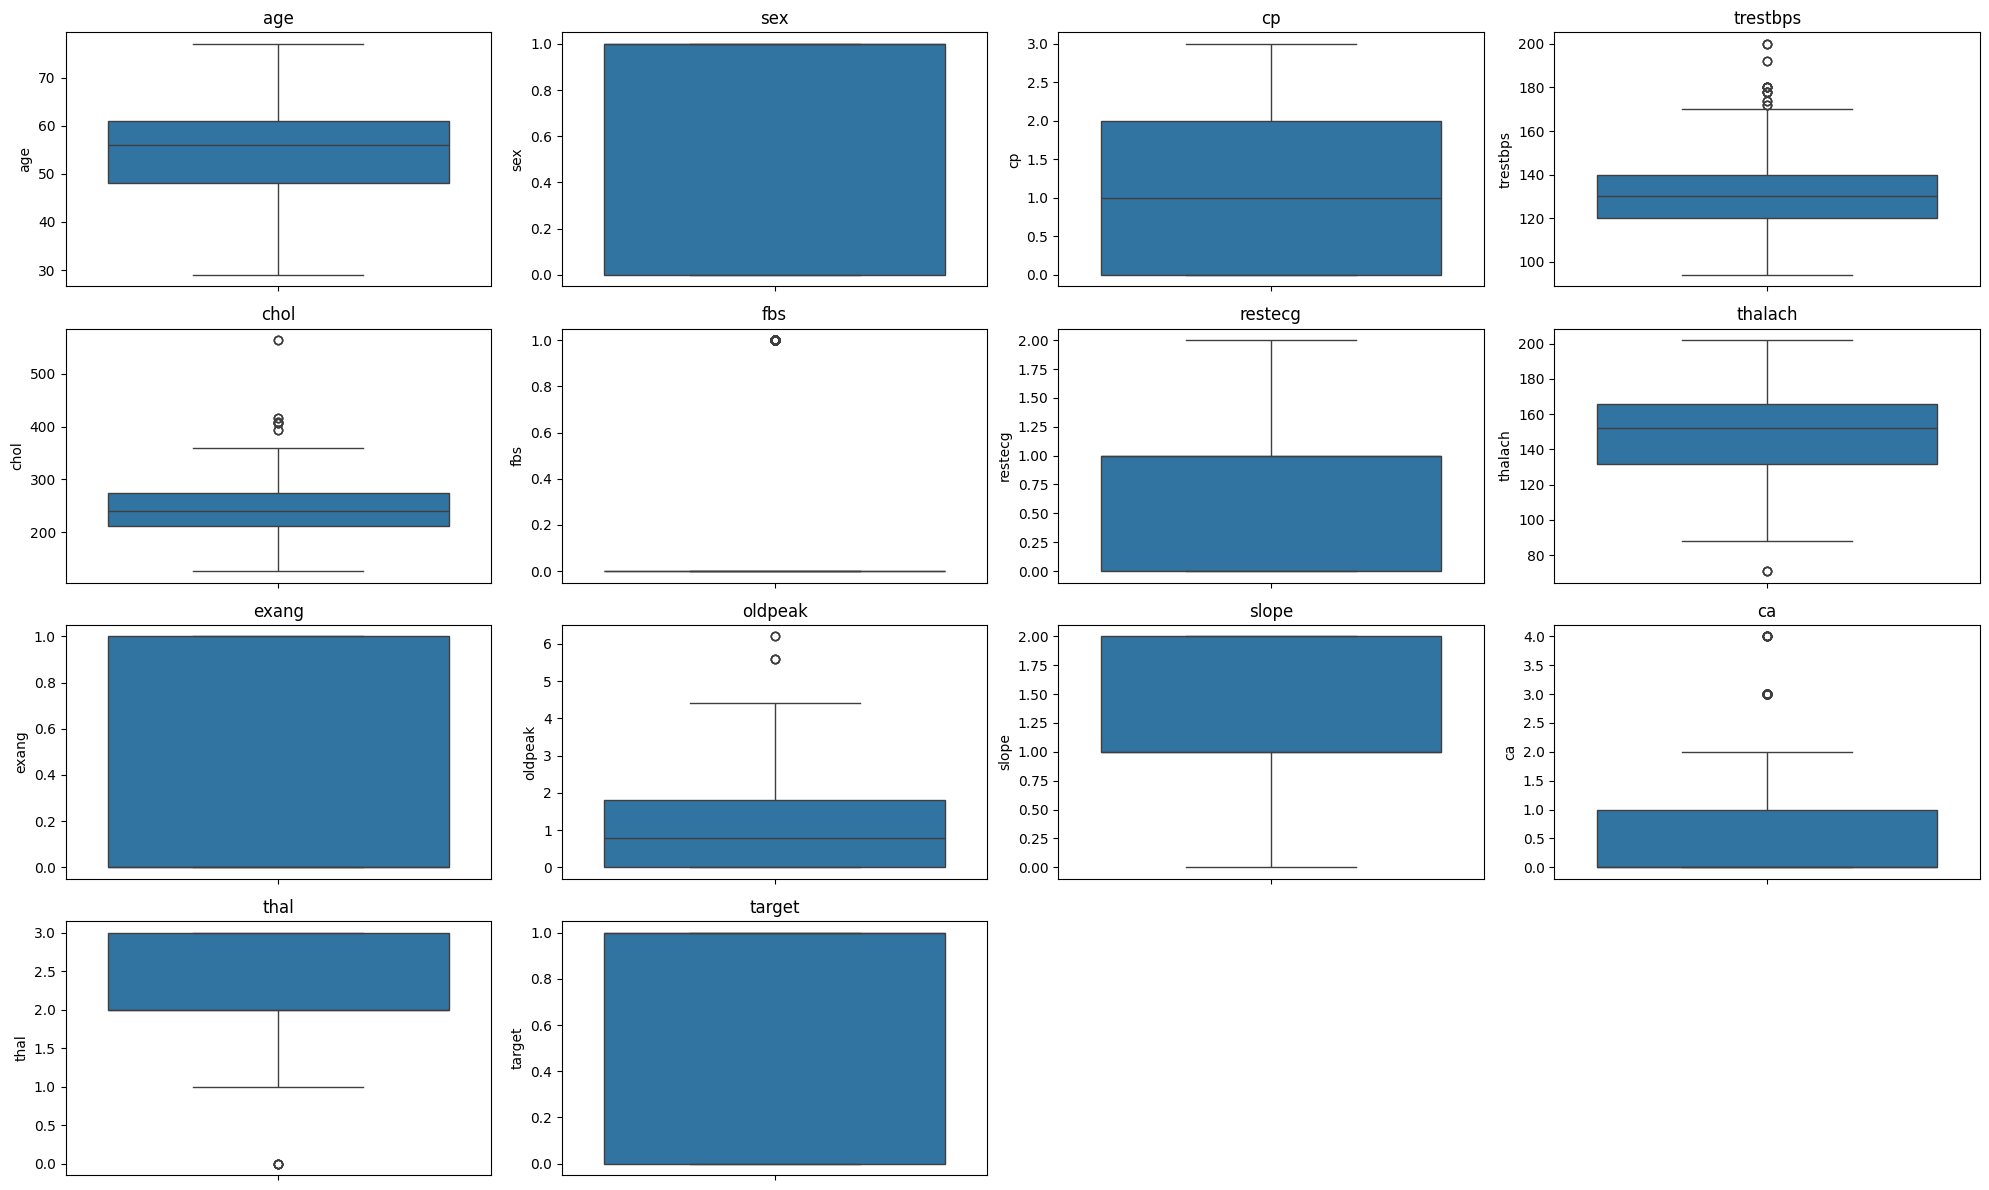

In [ ]:

# Plot boxplots for numeric features
numeric_features = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_features):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_features] < (Q1 - 1.5 * IQR)) |
            (df[numeric_features] > (Q3 + 1.5 * IQR))).sum()
print("Outliers per feature:\n", outliers)

Outliers per feature:
 age           0
sex           0
cp            0
trestbps     30
chol         16
fbs         153
restecg       0
thalach       4
exang         0
oldpeak       7
slope         0
ca           87
thal          7
target        0
dtype: int64


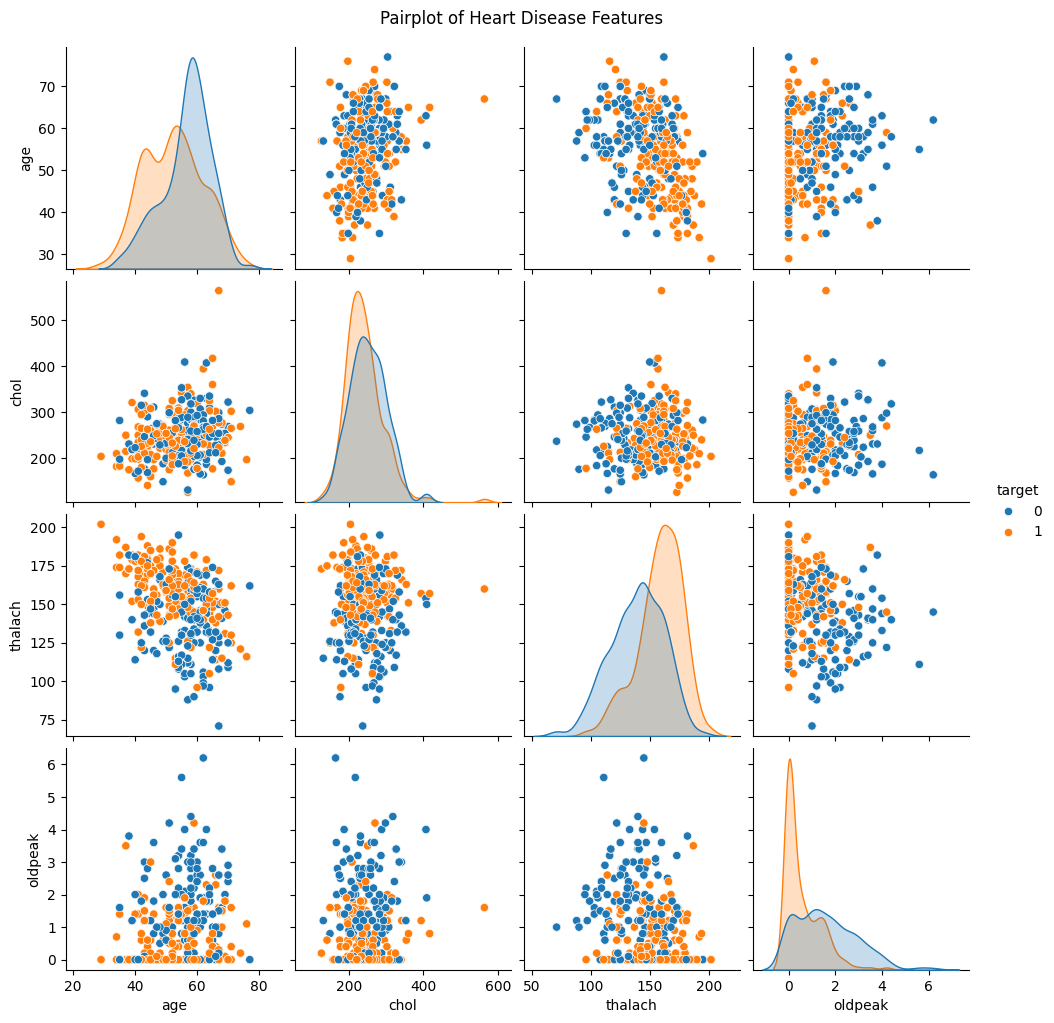

In [ ]:
sns.pairplot(df[['age', 'chol', 'thalach', 'oldpeak', 'target']], hue='target')
plt.suptitle("Pairplot of Heart Disease Features", y=1.02)
plt.show()

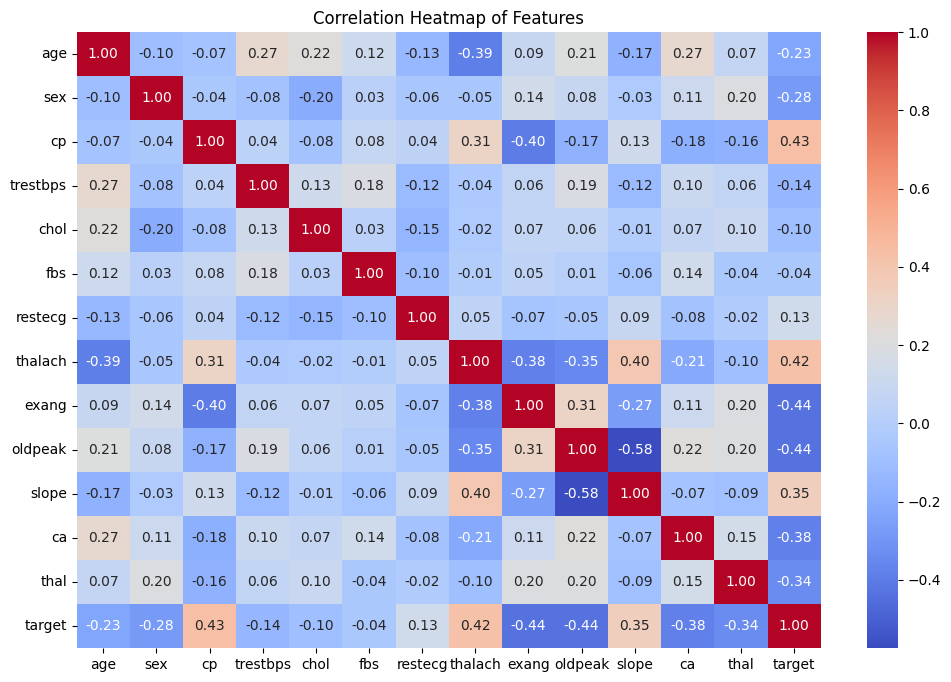

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

Visualizations of Feature Relationships with **Target**

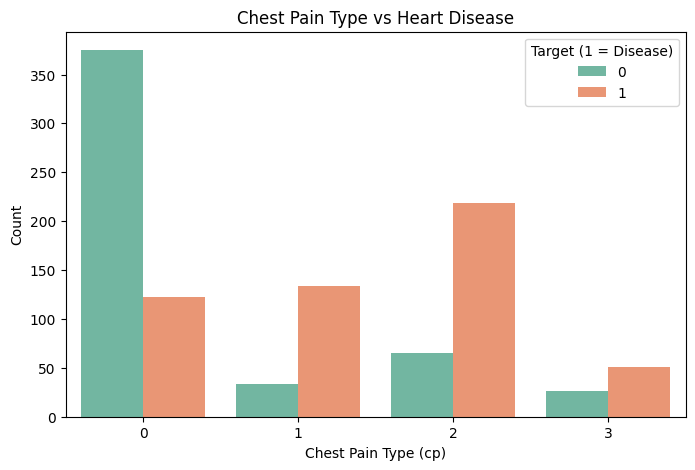

In [ ]:
#comparison Chest Pain Type vs Heart Disease
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='cp', hue='target', palette='Set2')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.legend(title='Target (1 = Disease)')
plt.show()

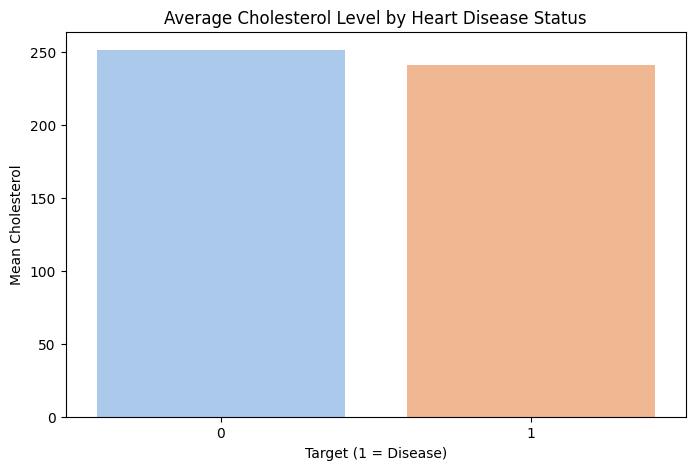

In [ ]:
# Bar Graph: Mean Cholesterol by Target Class

plt.figure(figsize=(8, 5))
sns.barplot(x='target', y='chol', data=df, errorbar=None, palette='pastel',legend=False,hue='target')
plt.title('Average Cholesterol Level by Heart Disease Status')
plt.xlabel('Target (1 = Disease)')
plt.ylabel('Mean Cholesterol')
plt.show()

In [ ]:
#Feature and label separation
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
 #Train-test split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Feature scaling (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [ ]:
#  Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=32) # You can adjust n_neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
models = {
    'Random Forest': y_pred_rf,
    'SVM': y_pred_svm,
    'Naive Bayes': y_pred_nb,
    'Decision Tree': y_pred_dt,
    'KNN': y_pred_knn,
    'Logistic Regression': y_pred_lr
}

for name, pred in models.items():
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred))


Model: Random Forest
Accuracy: 0.9853658536585366
Confusion Matrix:
 [[102   0]
 [  3 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Model: SVM
Accuracy: 0.8878048780487805
Confusion Matrix:
 [[85 17]
 [ 6 97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205


Model: Naive Bayes
Accuracy: 0.8
Confusion Matrix:
 [[72 30]
 [11 92]]
Classification Report:
               precision    rec

In [ ]:

results = []
for name, pred in models.items():
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision})
    results_df = pd.DataFrame(results)
print("\nModel Accuracy and Precision:")
display(results_df)



Model Accuracy and Precision:


,Model,Accuracy,Precision
0,Random Forest,0.985366,1.000000
1,SVM,0.887805,0.850877
2,Naive Bayes,0.800000,0.754098
3,Decision Tree,0.985366,1.000000
4,KNN,0.795122,0.752066
5,Logistic Regression,0.795122,0.756303


In [ ]:
trained_models = {
    'Random Forest': rf,
    'SVM': svm,
    'Naive Bayes': nb,
    'Decision Tree': dt,
    'KNN': knn,
    'Logistic Regression': lr
}

## Cross-Validation (5-fold)
print("\n--- Cross-Validation Results (5-fold) ---")
for name, model in trained_models.items(): # <-- Loop over the new dictionary
    # Using the original X and y for cross-validation
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} - 5-fold Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# %%
## Cross-Validation (10-fold)
print("\n--- Cross-Validation Results (10-fold) ---")
for name, model in trained_models.items(): # <-- Loop over the new dictionary
    # Using the original X and y for cross-validation
    scores = cross_val_score(model, X, y, cv=10)
    print(f"{name} - 10-fold Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


--- Cross-Validation Results (5-fold) ---
Random Forest - 5-fold Cross-Validation Accuracy: 0.9971 ± 0.0059
SVM - 5-fold Cross-Validation Accuracy: 0.7034 ± 0.0293
Naive Bayes - 5-fold Cross-Validation Accuracy: 0.8215 ± 0.0368
Decision Tree - 5-fold Cross-Validation Accuracy: 0.9961 ± 0.0078
KNN - 5-fold Cross-Validation Accuracy: 0.6829 ± 0.0401
Logistic Regression - 5-fold Cross-Validation Accuracy: 0.8498 ± 0.0304

--- Cross-Validation Results (10-fold) ---
Random Forest - 10-fold Cross-Validation Accuracy: 0.9971 ± 0.0088
SVM - 10-fold Cross-Validation Accuracy: 0.6897 ± 0.0405
Naive Bayes - 10-fold Cross-Validation Accuracy: 0.8213 ± 0.0492
Decision Tree - 10-fold Cross-Validation Accuracy: 1.0000 ± 0.0000
KNN - 10-fold Cross-Validation Accuracy: 0.6974 ± 0.0455
Logistic Regression - 10-fold Cross-Validation Accuracy: 0.8448 ± 0.0381
